## Health Insurance Cost Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### load Data

In [2]:
# load the csv data to a pandas dataframe
insurance_data= pd.read_csv('insurance.csv')
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# print the first 5 rows of the dataset
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# print the last 5 rows of the dataset
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


#### number of rows & columns :

In [5]:
insurance_data.shape

(1338, 7)

#### list of columns :

In [6]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#### column datatype

In [7]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### data information

In [8]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### check duplicate records

In [9]:
insurance_data.duplicated().any()

True

In [10]:
insurance_data[insurance_data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [11]:
insurance_data1=insurance_data.drop_duplicates()

In [12]:
insurance_data1.shape

(1337, 7)

### check for missing vlues

In [13]:
insurance_data1.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [14]:
insurance_data1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### list of categorical and numeric columns

In [15]:
# Sélection des colonnes numériques
Numerical_columns = insurance_data1.select_dtypes(include="number").columns.to_list()

# Sélection des colonnes catégoriques
Categorical_columns = insurance_data1.select_dtypes(exclude="number").columns.to_list()

# Affichage des colonnes numériques et catégoriques
print(f"Numerical columns in the data: {Numerical_columns}")
print(f"Categorical columns in the data: {Categorical_columns}")

Numerical columns in the data: ['age', 'bmi', 'children', 'charges']
Categorical columns in the data: ['sex', 'smoker', 'region']


#### statistical mesure of numeric columns

In [16]:
insurance_data1.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### statistical mesure of numeric columns

In [17]:
insurance_data1.describe(exclude='number')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [18]:
insurance_data1['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [19]:
insurance_data1['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [20]:
insurance_data1['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [21]:
insurance_data1['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [22]:
insurance_data1['region'].nunique()

4

## Data Visualisations

####  Histogram: Numeric Columns


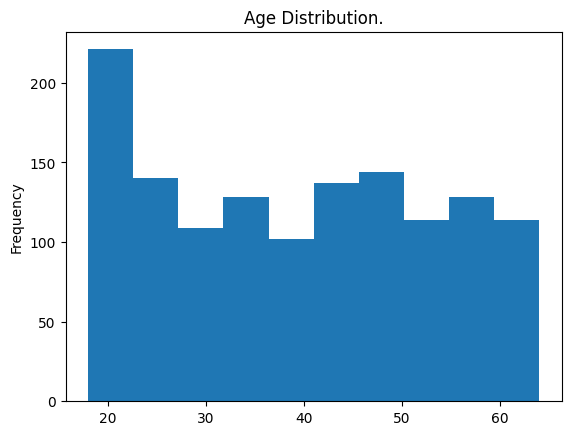

In [23]:
insurance_data1['age'].plot(kind='hist')
plt.title("Age Distribution.")
plt.show()


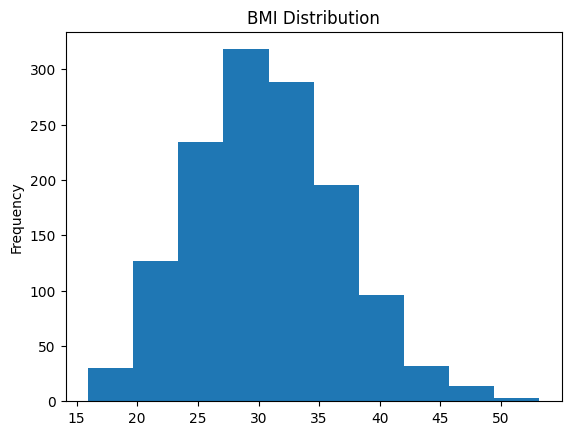

In [24]:
insurance_data1['bmi'].plot(kind='hist')
plt.title("BMI Distribution")
plt.show()



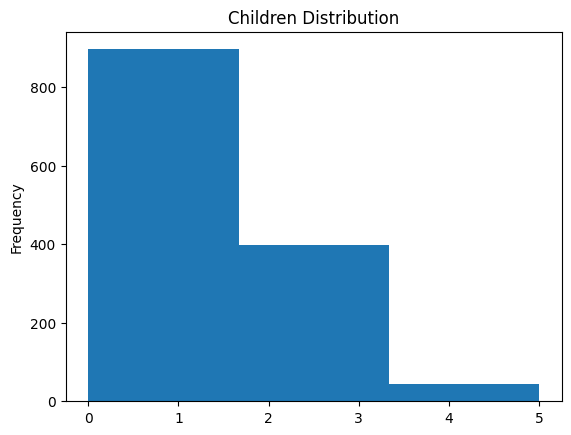

In [25]:
insurance_data1['children'].plot(kind='hist', bins=3)
plt.title("Children Distribution")
plt.show()



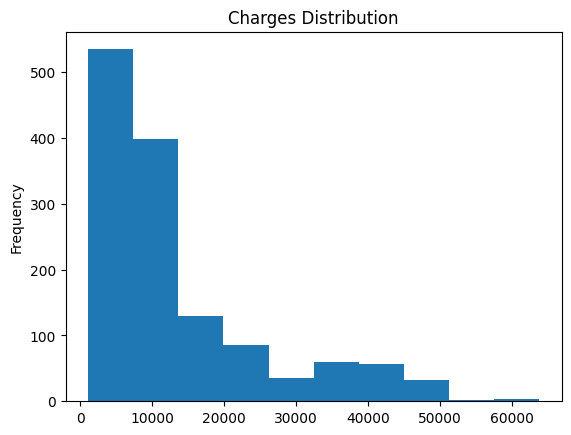

In [26]:
insurance_data1['charges'].plot(kind='hist')
plt.title("Charges Distribution")
plt.show()

####  Bar Graph - Categorical Columns


<Axes: xlabel='children'>

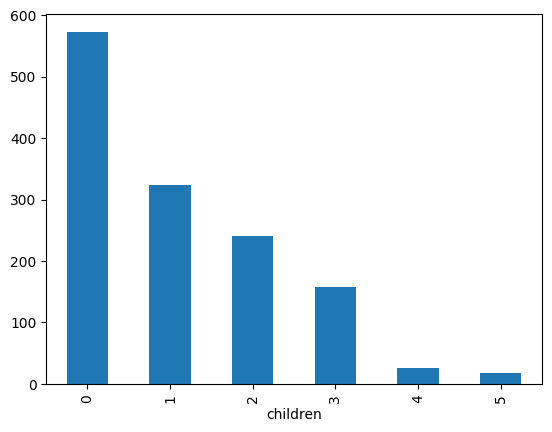

In [27]:
insurance_data1["children"].value_counts().plot(kind='bar')



<Axes: xlabel='sex'>

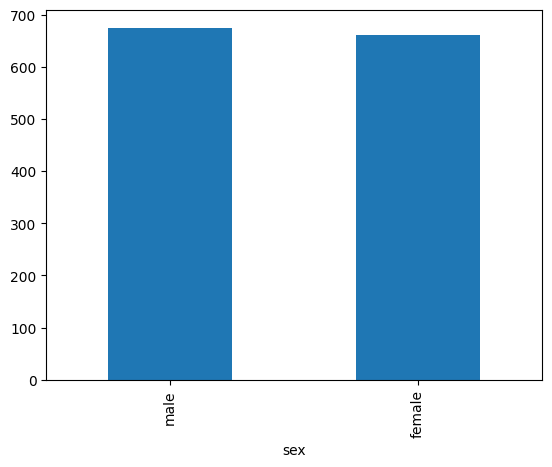

In [28]:
insurance_data1["sex"].value_counts().plot(kind='bar')



<Axes: xlabel='region'>

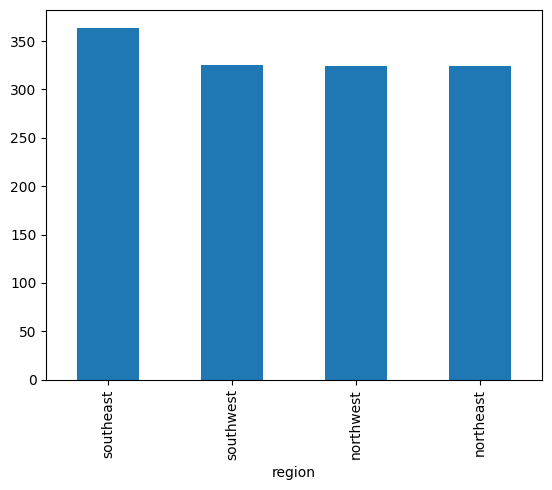

In [29]:
insurance_data1["region"].value_counts().plot(kind='bar')

<Axes: xlabel='smoker'>

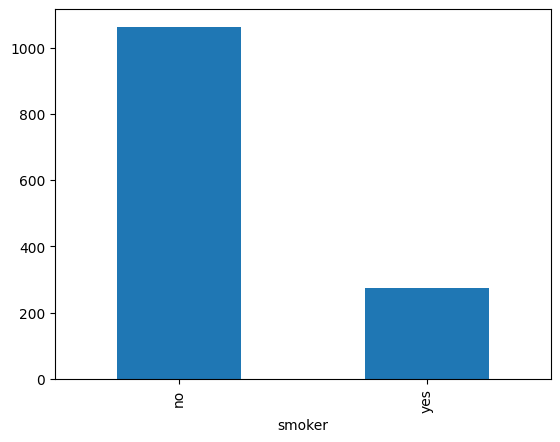

In [30]:
insurance_data1["smoker"].value_counts().plot(kind='bar')

####  Box Plot - Numeric Columns



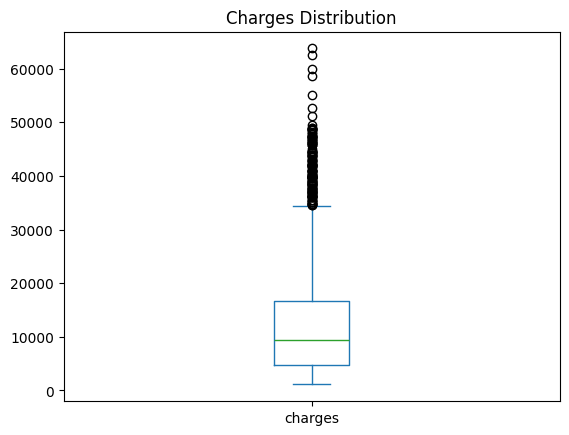

In [31]:
insurance_data1['charges'].plot(kind='box')
plt.title("Charges Distribution")
plt.show()

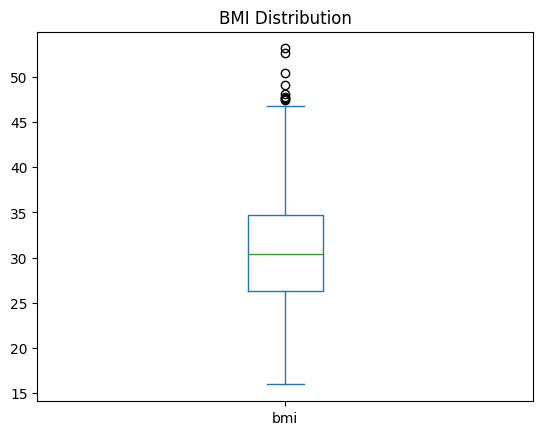

In [32]:
insurance_data1['bmi'].plot(kind='box')
plt.title("BMI Distribution")
plt.show()

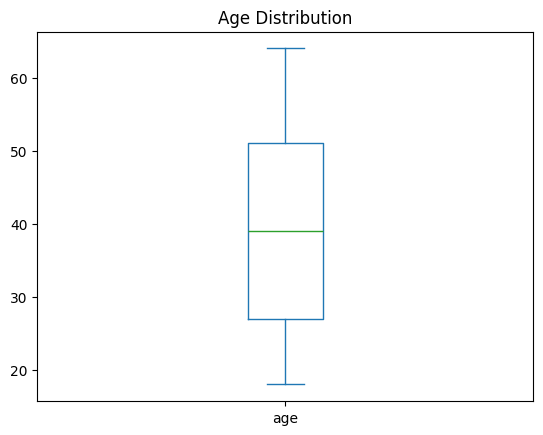

In [33]:
insurance_data1['age'].plot(kind='box')
plt.title("Age Distribution")
plt.show()

#### Pie Chart - Region


In [34]:
region_count = insurance_data1["region"].value_counts()
region_count


region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

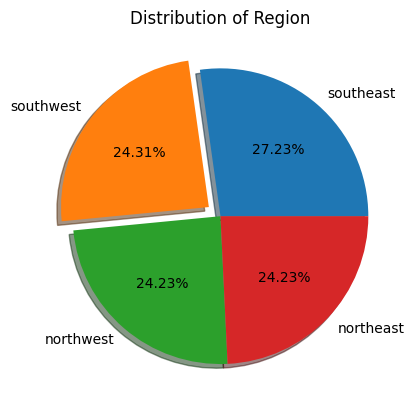

In [35]:
plt.pie(
    labels=region_count.index,
    x=region_count.values,
    shadow=True,
    autopct='%.2f%%',
    explode=(0, 0.1, 0, 0)
)
plt.title("Distribution of Region")
plt.show()


#### Correlation Matrix



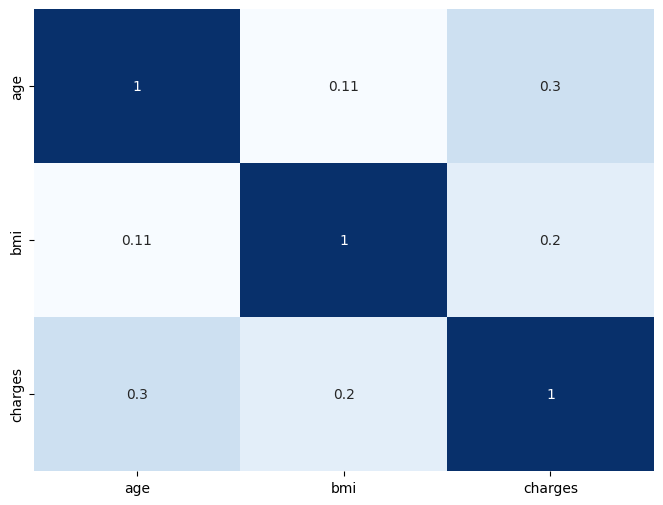

In [36]:
corr_data = insurance_data1[["age", "bmi", "charges"]].corr()

plt.figure(figsize=(8, 6))  # The figure size
sns.heatmap(
    round(corr_data, 2),
    annot=True,
    cmap="Blues",
    cbar=False
)
plt.show()

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the correlation matrix
correlation_matrix = insurance_data1.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="seismic", cbar=True, vmin=-1, vmax=1)

# Add title
plt.title("Dependencies of Medical Charges", fontsize=14)

# Save the heatmap as an image
plt.savefig("heatmap_with_seismic.png", dpi=300)

# Display the heatmap
plt.show()

ValueError: could not convert string to float: 'female'

In [ ]:
# Group by region and calculate the proportion of smokers
Region_smoker_df = insurance_data1.groupby('region')['smoker'].apply(lambda x: (x == 'yes').mean()).reset_index()
Region_smoker_df.rename(columns={'smoker': 'smoker_proportion'}, inplace=True)

# Display the dataframe
print(Region_smoker_df)

# Plot the proportion of smokers by region
Region_smoker_df.plot(kind='bar', x='region', y='smoker_proportion', legend=False)
plt.title('Proportion of Smokers by Region')
plt.ylabel('Proportion of Smokers')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.show()

#### Scatter Plot



In [ ]:
plt.scatter(data=insurance_data1, x='age', y='charges')


In [ ]:
plt.scatter(data=insurance_data1, x='bmi', y='charges')


In [ ]:

plt.scatter(data=insurance_data1, x='bmi', y='age')


#### Insurance Cost for Smoker and Non-Smoker


In [ ]:
smoker_df = insurance_data1.groupby("smoker")["charges"].mean().reset_index()
smoker_df


In [ ]:

smoker_df.plot(kind='bar', x='smoker', y='charges')


#### Insurance Cost for Male and Female


In [ ]:
gender_df = insurance_data1.groupby('sex')['charges'].mean().reset_index()
gender_df

In [ ]:
gender_df.plot(kind='bar', x='sex', y='charges')

#### Region wise Insurance cost


In [ ]:
Region_df = insurance_data1.groupby('region')['charges'].mean().reset_index()
Region_df

In [ ]:
Region_df.plot(kind='bar', x='region', y='charges')

#### Region wise BMI


In [ ]:
gender_bmi_df = insurance_data1.groupby('region')['bmi'].mean().reset_index()
gender_bmi_df

In [ ]:
gender_bmi_df.plot(kind='bar', x='region', y='bmi')

## Machine Learning Model Development

In [ ]:
insurance_data1.head()

#### Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
insurance_data1['sex'] = le.fit_transform(insurance_data1['sex'])
insurance_data1['smoker'] = le.fit_transform(insurance_data1['smoker'])
insurance_data1['region'] = le.fit_transform(insurance_data1['region'])

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_12328\1414544026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_data1['sex'] = le.fit_transform(insurance_data1['sex'])
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_12328\1414544026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_data1['smoker'] = le.fit_transform(insurance_data1['smoker'])
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_12328\1414544026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [44]:
insurance_data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#### X - Independent Variable

#### Y - Dependent Variable

In [45]:
X = insurance_data1.drop(columns=["charges"], axis=1)
y = insurance_data1["charges"]

In [46]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [47]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

## Splitting the Data into Train and Test

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

## Vérification des dimensions des ensembles divisés
print(f"The shape of X_train: {X_train.shape}")
print(f"The shape of y_train: {y_train.shape}")
print("*" * 30)
print(f"The shape of X_test: {X_test.shape}")
print(f"The shape of y_test: {y_test.shape}")

The shape of X_train: (1069, 6)
The shape of y_train: (1069,)
******************************
The shape of X_test: (268, 6)
The shape of y_test: (268,)


#### Features Scalling

In [49]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [50]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

In [51]:

X['age'] = std_scaler.fit_transform(np.array(X['age']).reshape(-1, 1))
X['bmi'] = std_scaler.fit_transform(np.array(X['bmi']).reshape(-1, 1))
X['children'] = std_scaler.fit_transform(np.array(X['children']).reshape(-1, 1))

In [52]:
X

,age,sex,bmi,children,smoker,region
0,-1.440418,0,-0.453160,-0.909234,1,3
1,-1.511647,1,0.509422,-0.079442,0,2
2,-0.799350,1,0.383155,1.580143,0,2
3,-0.443201,1,-1.305052,-0.909234,0,1
4,-0.514431,1,-0.292456,-0.909234,0,1
...,...,...,...,...,...,...
1333,0.767704,1,0.050269,1.580143,0,1
1334,-1.511647,0,0.206053,-0.909234,0,0
1335,-1.511647,0,1.014490,-0.909234,0,2
1336,-1.297958,0,-0.797524,-0.909234,0,3


#### Develop Linear Regression Model

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:

# Initialize the linear regression model
linear_reg_model = LinearRegression()


In [55]:
# Train the model on training data
linear_reg_model.fit(X_train, y_train)


LinearRegression()

In [59]:
from sklearn.metrics import mean_squared_error

# For Linear Regression Model
# Predict the target values for the training and test datasets
linear_train_pred = linear_reg_model.predict(X_train)
linear_test_pred = linear_reg_model.predict(X_test)

# Calculate RMSE for the Linear Regression model
linear_rmse_train = np.sqrt(mean_squared_error(y_train, linear_train_pred))
linear_rmse_test = np.sqrt(mean_squared_error(y_test, linear_test_pred))
print(f"Linear Regression RMSE on Training Data: {linear_rmse_train:.2f}")
print(f"Linear Regression RMSE on Testing Data: {linear_rmse_test:.2f}")



Linear Regression RMSE on Training Data: 6083.22
Linear Regression RMSE on Testing Data: 5957.61


#### Develop Decision Tree Regressor

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Decision Tree Regressor with optional parameters (you can adjust as needed)
decision_tree_model = DecisionTreeRegressor(max_leaf_nodes=10, random_state=42)

decision_tree_model

DecisionTreeRegressor(max_leaf_nodes=10, random_state=42)

In [64]:
# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on both training and testing data
dt_train_predictions = decision_tree_model.predict(X_train)
dt_test_predictions = decision_tree_model.predict(X_test)

# Calculate RMSE for the training and testing datasets
dt_rmse_train = np.sqrt(mean_squared_error(y_train, dt_train_predictions))
dt_rmse_test = np.sqrt(mean_squared_error(y_test, dt_test_predictions))

# Print RMSE results
print(f"Decision Tree RMSE on Training Data: {dt_rmse_train:.3f}")
print(f"Decision Tree RMSE on Testing Data: {dt_rmse_test:.3f}")

Decision Tree RMSE on Training Data: 4553.662
Decision Tree RMSE on Testing Data: 4340.676


#### Cross Validation

In [65]:

# Import cross-validation functions
from sklearn.model_selection import cross_val_score, cross_validate


In [66]:
# Perform cross-validation
result = cross_validate(
    linear_reg_model,
    X,
    y,
    cv=5,
    return_train_score=True,
    scoring='r2'
)
print(result)

{'fit_time': array([0.00799274, 0.00899506, 0.00608873, 0.00799966, 0.00899577]), 'score_time': array([0.00499582, 0.00499821, 0.00599551, 0.00308561, 0.00399709]), 'test_score': array([0.76123487, 0.70840689, 0.77720769, 0.73365562, 0.7551376 ]), 'train_score': array([0.74737531, 0.75930033, 0.74326474, 0.75468466, 0.74915469])}


In [67]:

# Calculate and display the training accuracy
train_acc = result['train_score'].mean() * 100
print('Training Accuracy =', round(train_acc, 2), '%')


Training Accuracy = 75.08 %


In [75]:
# Calculate and display the testing accuracy
test_acc = result['test_score'].mean() * 100
print('Testing Accuracy =', round(test_acc, 2), '%')

Testing Accuracy = 80.67 %


## Multiple Models

In [76]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate


In [77]:
# List of models to evaluate
models = []
models.append(("Linear Regression", LinearRegression()))
models.append(("Knn", KNeighborsRegressor()))
models.append(("Decision Tree", DecisionTreeRegressor()))
models.append(("Random Forest", RandomForestRegressor()))
models.append(("SVR", SVR()))
models.append(("XGBoost", xgb.XGBRegressor()))
models.append(("Ridge Regressiont", Ridge(alpha=1.0)))
models.append(("Lasso Regression", Lasso(alpha=1.0)))

# Perform cross-validation for each model
for model in models:
    result = cross_validate(model[1], X, y, cv=5, return_train_score=True, scoring='r2')
    print(model[0])
    # Calculate training and testing R² scores
    train_acc = round((result["train_score"].mean()) * 100, 2)
    test_acc = round((result["test_score"].mean()) * 100, 2)
    print(f'Train R² score: {train_acc}')
    print(f'Test R² score: {test_acc}')
    print('\n')

Linear Regression
Train R² score: 75.08
Test R² score: 74.71


Knn
Train R² score: 81.44
Test R² score: 68.87


Decision Tree
Train R² score: 99.9
Test R² score: 71.29


Random Forest
Train R² score: 97.7
Test R² score: 83.53


SVR
Train R² score: -10.22
Test R² score: -10.27


XGBoost
Train R² score: 99.5
Test R² score: 80.67


Ridge Regressiont
Train R² score: 75.07
Test R² score: 74.71


Lasso Regression
Train R² score: 75.08
Test R² score: 74.71




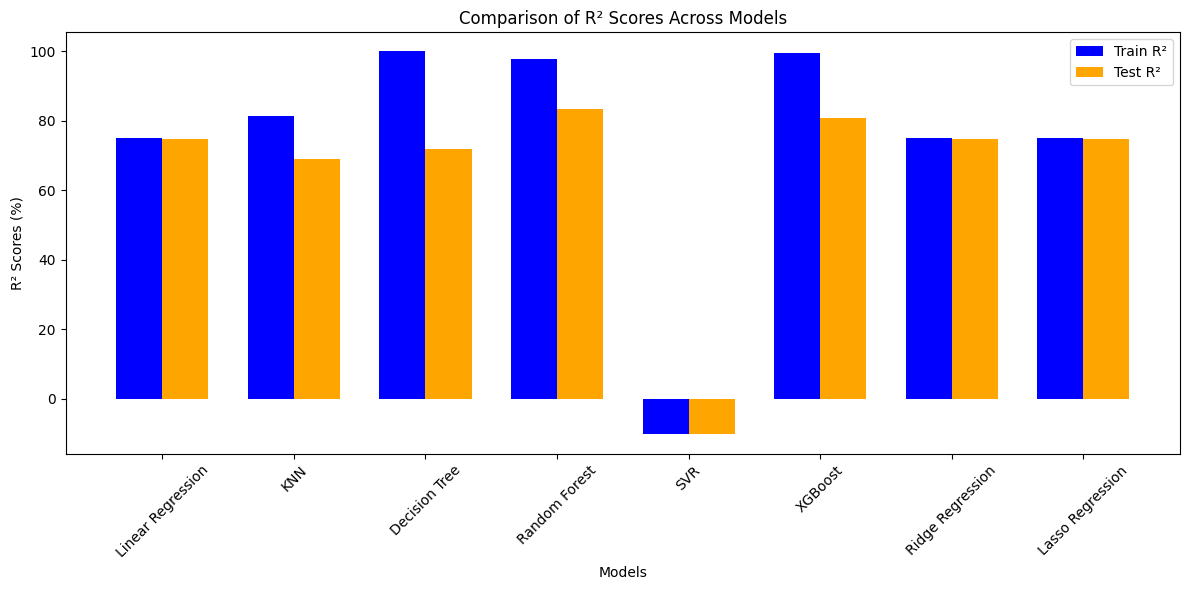

In [78]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

# List of models to evaluate
models = [
    ("Linear Regression", LinearRegression()),
    ("KNN", KNeighborsRegressor()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("SVR", SVR()),
    ("XGBoost", xgb.XGBRegressor()),
    ("Ridge Regression", Ridge(alpha=1.0)),
    ("Lasso Regression", Lasso(alpha=1.0))
]

# Lists to store results
train_r2_scores = []
test_r2_scores = []
model_names = []

# Perform cross-validation for each model
for model_name, model in models:
    result = cross_validate(model, X, y, cv=5, return_train_score=True, scoring='r2')
    
    # Calculate mean R² scores for training and testing
    train_acc = round(result["train_score"].mean() * 100, 2)
    test_acc = round(result["test_score"].mean() * 100, 2)
    
    # Append results
    train_r2_scores.append(train_acc)
    test_r2_scores.append(test_acc)
    model_names.append(model_name)

# Plot the results
bar_width = 0.35  # Width of bars
index = range(len(models))  # X positions for bars

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(index, train_r2_scores, bar_width, label="Train R²", color="blue")
plt.bar([i + bar_width for i in index], test_r2_scores, bar_width, label="Test R²", color="orange")

# Add labels and title
plt.xlabel("Models")
plt.ylabel("R² Scores (%)")
plt.title("Comparison of R² Scores Across Models")
plt.xticks([i + bar_width / 2 for i in index], model_names, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

##  Random Forest hyperparameter tuning using RandomizedSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [72]:
# Define the parameter grid for tuning
params = {
    'n_estimators': [100, 200, 300],  # Number of trees in the random forest
    'max_depth': [None, 5, 10],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],   # Minimum samples required at each leaf node
    'bootstrap': [True, False]       # Whether to bootstrap samples for training each tree
}

# Tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(
    param_distributions=params,      # Parameter grid
    estimator=RandomForestRegressor(), # Random Forest model
    cv=5,                            # Number of cross-validation folds
    return_train_score=True,         # Include training scores in the results
    scoring='r2',                    # Metric for optimization (R² score)
    n_jobs=-1                        # Use all available CPU cores
)

In [73]:
# Fit the random search model on the data
random_search.fit(X, y)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, scoring='r2')

In [74]:
print(random_search)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, scoring='r2')


In [ ]:
# Retrieve the best hyperparameters
random_search.best_params_

In [ ]:
# Retrieve the mean training score (multiplied by 100 for percentage)
random_search.cv_results_['mean_train_score'].mean() * 100

In [ ]:
# Retrieve the mean test score (multiplied by 100 for percentage)
random_search.cv_results_['mean_test_score'].mean() * 100


In [ ]:
# Create a RandomForestRegressor with the best parameters
RF = RandomForestRegressor(
    n_estimators=200,      # Best value from RandomizedSearchCV
    min_samples_split=5,   # Best value from RandomizedSearchCV
    min_samples_leaf=4,     # Best value from RandomizedSearchCV
    max_depth=5,
    bootstrap=True         
)

In [ ]:
RF.fit(X_train,y_train)

In [ ]:
RF.score(X_test, y_test)  # Evaluate on test data

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
predicted_train_data = RF.predict(X_train)
train_score = r2_score(y_true=y_train, y_pred=predicted_train_data)
predicted_test_data = RF.predict(X_test)
test_score = r2_score(y_true=y_test, y_pred=predicted_test_data)
print(f"R-squared (R^2) For Training Data Using Random Forest: {round(train_score,2)*100} %")
print(f"R-squared (R^2) For Testing Data Using Random Forest: {round(test_score,2)*100} %")


### Create a Scatter Plot With A Regression Line

In [ ]:
sns.regplot(x = y_train, y = predicted_train_data,
            lowess = True, ## Add a locally weighted scatterplot smoothing line
            line_kws = {'color': 'red'}, ## the color of the regression line
            scatter_kws = {'alpha': 0.25}) ## the transparency of the scatter points
plt.title("Y TRAIN ACTUAL VS. Y TRAIN PREDICTED, ".title())
plt.xlabel('Y TRAIN ACTUAL')
plt.ylabel('Y TRAIN PREDICTED')
plt.show()


In [ ]:
sns.regplot(x = y_test, y = predicted_test_data,
            lowess = True, ## Add a locally weighted scatterplot smoothing line
            line_kws = {'color': 'red'}, ## the color of the regression line
            scatter_kws = {'alpha': 0.25}) ## the transparency of the scatter points
plt.title("Y TEST ACTUAL VS. Y TEST PREDICTED, ".title())
plt.xlabel('Y TEST ACTUAL')
plt.ylabel('Y TEST PREDICTED')
plt.show()

In [ ]:
X

#### Customized predictions

In [ ]:
age=24
sex=1
bmi=35
children=3
smoker=1
region=3

In [ ]:
# Initialisation des variables avec des valeurs
age = 24
sex = 1  # 1 pour male, 0 pour female (selon votre cas d'usage)
bmi = 35
children = 3
smoker = 1  # 1 pour fumeur, 0 pour non-fumeur
region = 3  # Valeur pour la région, selon la codification

# Transformation des données avec StandardScaler
age1 = std_scaler.transform([[age]])
bmi1 = std_scaler.transform([[bmi]])
cld1 = std_scaler.transform([[children]])

# Prédiction avec le modèle RandomForest
prediction = RF.predict([[age1[0][0], sex, bmi1[0][0], cld1[0][0], smoker, region]])

# Affichage de la prédiction
print("La prédiction est :", prediction)


In [ ]:
import pickle

Pkl_Filename = "rf_tuned.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(RF, file)
print(f"Modèle sauvegardé sous {Pkl_Filename}")

In [ ]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    rf_tuned_loaded = pickle.load(file)
# Afficher le modèle chargé pour vérifier qu'il a bien été chargé
print(rf_tuned_loaded)

In [ ]:
input_data = np.array([20, 1, 28, 0, 1, 3]).reshape(1, -1)  # Exemple avec 6 caractéristiques
pred = rf_tuned_loaded.predict(input_data)[0]

# Afficher la prédiction formatée à 3 décimales
print(f'{pred:.3f}')

In [ ]:
input_data = np.array([20, 1, 28, 0, 1, 3]).reshape(1, -1)
pred = rf_tuned_loaded.predict(input_data)[0]

# Display prediction
print(f'{pred:.3f}')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import pickle

# Assuming data is already preprocessed and split into X (features) and y (target variable)
# You can keep the splitting and scaling part as before
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
# std_scaler = StandardScaler()
# X['age'] = std_scaler.fit_transform(np.array(X['age']).reshape(-1, 1))
# X['bmi'] = std_scaler.fit_transform(np.array(X['bmi']).reshape(-1, 1))
# X['children'] = std_scaler.fit_transform(np.array(X['children']).reshape(-1, 1))

# Random Forest Model without monotonic constraints
RF = RandomForestRegressor(
    n_estimators=200,      # Number of trees
    min_samples_split=5,   # Minimum samples to split a node
    min_samples_leaf=4,    # Minimum samples at leaf nodes
    max_depth=5,           # Maximum depth of the trees
    bootstrap=True         # Use bootstrap sampling
)

# Train the Random Forest model
RF.fit(X_train, y_train)

# Evaluate the model
train_score = r2_score(y_train, RF.predict(X_train))
test_score = r2_score(y_test, RF.predict(X_test))

print(f"R-squared (R^2) For Training Data Using Random Forest: {round(train_score, 2) * 100} %")
print(f"R-squared (R^2) For Testing Data Using Random Forest: {round(test_score, 2) * 100} %")

# Save the model
Pkl_Filename = "rf_tuned_no_monotonic.pkl"
with open(Pkl_Filename, 'wb') as file:
    pickle.dump(RF, file)

# Load the model
with open(Pkl_Filename, 'rb') as file:
    rf_tuned_loaded = pickle.load(file)

# Check the model
print(rf_tuned_loaded)

# Example prediction (assuming features are standardized if needed)
input_data = np.array([20, 1, 28, 0, 1, 3]).reshape(1, -1)
pred = rf_tuned_loaded.predict(input_data)[0]

# Display prediction
print(f'{pred:.3f}')


In [ ]:
import sklearn
print(sklearn.__version__)


In [79]:
# Création du modèle de forêt aléatoire
rf_model = RandomForestRegressor(random_state=42)

# Définir la grille des hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Utiliser GridSearchCV pour rechercher les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Récupérer le meilleur modèle
best_rf_model = grid_search.best_estimator_

# Prédiction sur l'ensemble de test
y_pred_rf_reg = best_rf_model.predict(X_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [80]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [82]:
import pickle as pkl

In [84]:
# Sauvegarder le modèle de forêt aléatoire optimisé
pkl.dump(best_rf_model, open('random_forest_model.pkl','wb'))

In [86]:
# Recharger le modèle de forêt aléatoire
loaded_rf_model = pkl.load(open('random_forest_model.pkl','rb'))